In [1]:
import numpy as np
import pandas as pd


In [2]:
import glob
pathwithwildcard = '../csv/2017/forBDTtraining/*/*.csv'
paths = glob.glob(pathwithwildcard)

In [3]:
df1_signal_dict = {}
df1_TT_dict = {}

for path in paths:
    if 'ttHToNonbb' in path:
        df1_signal_dict[path] = pd.read_csv(path)

for path in paths:
    if not (('ttHToNonbb' in path)or('PSweights' in path)):
        if 'TTTo' in path:
            df1_TT_dict[path] = pd.read_csv(path)

In [4]:
tmp_sig = []
for keys in df1_signal_dict.keys():
    tmp_sig.append(df1_signal_dict[keys])
tmp_TT = []
for keys in df1_TT_dict.keys():
    tmp_TT.append(df1_TT_dict[keys])


In [5]:
df1_signal = pd.concat(tmp_sig)
df1_TT = pd.concat(tmp_TT)

In [6]:
print df1_signal.shape, df1_TT.shape

(44026, 124) (20293, 124)


In [7]:
varlist=[
    'AK12_lead_mass',
    'AK12_lead_pt',
    'DR_AK12_tau',
    'avg_dr_jet',
    'b1_loose_pt',
    'b1_pt',
    'b2_loose_pt',
    'b2_pt',
    'detabb',
    'detabb_loose',
    'dr_lep1_tau_os',
    'dr_leps',
    'drbb',
    'drbb_loose',
    'htmiss',
    'lep1_conePt',
    'lep1_eta',
    'lep1_fake_prob',
    'lep1_pt',
    'lep2_conePt',
    'lep2_eta',
    'lep2_genLepPt',
    'lep2_pt',
    'mT_lep1',
    'mT_lep2',
    'mTauTauVis',
    'max_lep_eta',
    'mbb',
    'mbb_loose',
    'minDR_AK12_L',
    'minDR_AK12_lep',
    'minDR_HTTv2_L',
    'minDR_HTTv2_lep',
    'minDR_HTTv2_tau',
    'mindr_lep1_jet',
    'mindr_lep2_jet',
    'mindr_tau_jet',
    'ptbb',
    'ptbb_loose',
    'ptmiss',
    'tau_eta',
    'tau_mva',
    'tau_pt',
    'N_jetAK12',
    'nBJetLoose',
    'nJet',
    'nMuon'
]

In [8]:
df1_signal = df1_signal[varlist]
df1_signal_target = [0]*df1_signal.shape[0]
df1_TT = df1_TT[varlist]
df1_TT_target = [1]*df1_TT.shape[0]

tmp0 = [df1_signal,df1_TT]
df1 = pd.concat(tmp0)
target = df1_signal_target+df1_TT_target
#df1['target'] = target

In [9]:
#train_test split
#df1_train = df1.sample(frac=0.3)
#df1_test = df1.drop(df1_train.index)

from sklearn.model_selection import train_test_split

df1_train, df1_test, df1_train_target, df1_test_target = train_test_split(df1, target, test_size=0.5)

In [10]:
#df1_train_target = df1_train['target'].copy()
#df1_train = df1_train.drop('target',axis=1)
#df1_test_target = df1_test['target'].copy()
#df1_test = df1_test.drop('target',axis=1)

In [11]:
from keras.utils import to_categorical
df1_train_target_cat = to_categorical(df1_train_target)
df1_test_target_cat = to_categorical(df1_test_target)

Using TensorFlow backend.


In [12]:
print df1_train_target_cat.shape, df1_train.shape, df1_test.shape, df1_test_target_cat.shape

(32159, 2) (32159, 47) (32160, 47) (32160, 2)


In [13]:
#df1_train_target
#df1_train_target_cat

In [14]:
print df1_train.columns.values

['AK12_lead_mass' 'AK12_lead_pt' 'DR_AK12_tau' 'avg_dr_jet' 'b1_loose_pt'
 'b1_pt' 'b2_loose_pt' 'b2_pt' 'detabb' 'detabb_loose' 'dr_lep1_tau_os'
 'dr_leps' 'drbb' 'drbb_loose' 'htmiss' 'lep1_conePt' 'lep1_eta'
 'lep1_fake_prob' 'lep1_pt' 'lep2_conePt' 'lep2_eta' 'lep2_genLepPt'
 'lep2_pt' 'mT_lep1' 'mT_lep2' 'mTauTauVis' 'max_lep_eta' 'mbb'
 'mbb_loose' 'minDR_AK12_L' 'minDR_AK12_lep' 'minDR_HTTv2_L'
 'minDR_HTTv2_lep' 'minDR_HTTv2_tau' 'mindr_lep1_jet' 'mindr_lep2_jet'
 'mindr_tau_jet' 'ptbb' 'ptbb_loose' 'ptmiss' 'tau_eta' 'tau_mva' 'tau_pt'
 'N_jetAK12' 'nBJetLoose' 'nJet' 'nMuon']


In [15]:
len(varlist)

47

In [16]:
#importing KERAS
import keras
from keras.layers import Embedding, Input, Flatten, Dense, Activation
from keras.models import Model, Sequential
from keras.optimizers import SGD



#df1_train_target = keras.utils.to_categorical(df1_train_target, num_classes=2)
#df1_test_target = keras.utils.to_categorical(df1_test_target, num_classes=2)

In [24]:
#defining keras model
model = Sequential()
model.add(Dense(1000,activation='relu',input_dim=len(varlist)))
model.add(Dense(10,activation='relu'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              48000     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 22        
Total params: 58,032
Trainable params: 58,032
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
hist = model.fit(df1_train,df1_train_target_cat,
                 batch_size=100,
                 epochs=20,
                 validation_data=(df1_test,df1_test_target_cat),
                 verbose = 1
                 )

Train on 32159 samples, validate on 32160 samples
Epoch 1/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4858 - acc: 0.7661 - val_loss: 0.4933 - val_acc: 0.7623
Epoch 2/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4855 - acc: 0.7644 - val_loss: 0.5065 - val_acc: 0.7494
Epoch 3/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4832 - acc: 0.7659 - val_loss: 0.4838 - val_acc: 0.7657
Epoch 4/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4817 - acc: 0.7696 - val_loss: 0.4850 - val_acc: 0.7670
Epoch 5/20
32159/32159 [==============================] - 1s 19us/step - loss: 0.4781 - acc: 0.7700 - val_loss: 0.4840 - val_acc: 0.7664
Epoch 6/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4784 - acc: 0.7692 - val_loss: 0.4899 - val_acc: 0.7619
Epoch 7/20
32159/32159 [==============================] - 1s 20us/step - loss: 0.4742 - acc: 0.7716 - val_loss: 0.5096 - val_acc

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib
from matplotlib import pyplot as plt

In [33]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(df1_test_target_cat[:,0],model.predict(df1_test)[:,0])
auc_keras = auc(fpr_keras, tpr_keras)

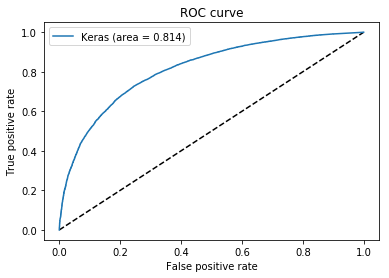

In [34]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()